<a href="https://colab.research.google.com/github/HarisMashood/ADL_Exercises/blob/main/Exercise_1_ADL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Loading and preprocessing datasets
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()
x_train_mnist = x_train_mnist.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test_mnist = x_test_mnist.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train_mnist = tf.keras.utils.to_categorical(y_train_mnist, num_classes=10)
y_test_mnist = tf.keras.utils.to_categorical(y_test_mnist, num_classes=10)

(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = tf.keras.datasets.cifar10.load_data()
x_train_cifar = x_train_cifar.astype('float32') / 255.0
x_test_cifar = x_test_cifar.astype('float32') / 255.0
y_train_cifar = tf.keras.utils.to_categorical(y_train_cifar, num_classes=10)
y_test_cifar = tf.keras.utils.to_categorical(y_test_cifar, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Function for creating CNN with different activation functions
def create_cnn(activation, input_shape):
    inputs = Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation=activation)(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation=activation)(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation=activation)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation=activation)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
# Function for training and evaluating the model
def train_and_evaluate(model, x_train, y_train, x_test, y_test, epochs=10):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        verbose=1)
    return history

In [ ]:
# Ploting training and validating metrics
def plot_metrics(histories, dataset_name):
    plt.figure(figsize=(15, 10))
    metrics = ['loss', 'accuracy']

    for metric in metrics:
        plt.subplot(2, 1, metrics.index(metric) + 1)
        for activation, history in histories.items():
            plt.plot(history.history[metric], label=f'{activation} {metric} (train)')
            plt.plot(history.history[f'val_{metric}'], label=f'{activation} {metric} (val)')
        plt.title(f'{dataset_name} - {metric.capitalize()}')
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.legend()

    plt.tight_layout()
    plt.show()


Training on MNIST dataset...

Using activation: sigmoid
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.5356 - loss: 1.3071 - val_accuracy: 0.9716 - val_loss: 0.1042
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9701 - loss: 0.1033 - val_accuracy: 0.9805 - val_loss: 0.0646
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9808 - loss: 0.0636 - val_accuracy: 0.9829 - val_loss: 0.0536
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9860 - loss: 0.0489 - val_accuracy: 0.9853 - val_loss: 0.0445
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9884 - loss: 0.0374 - val_accuracy: 0.9870 - val_loss: 0.0414
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9911 - loss: 0.0293 - val_accuracy: 0.9888 - val_loss: 0.0349
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9923 - loss: 0.0248 - val_accuracy: 0.9897 - val_loss: 0.0302
Epoch 8/10
1875/1875 ━━━━━━━━━━

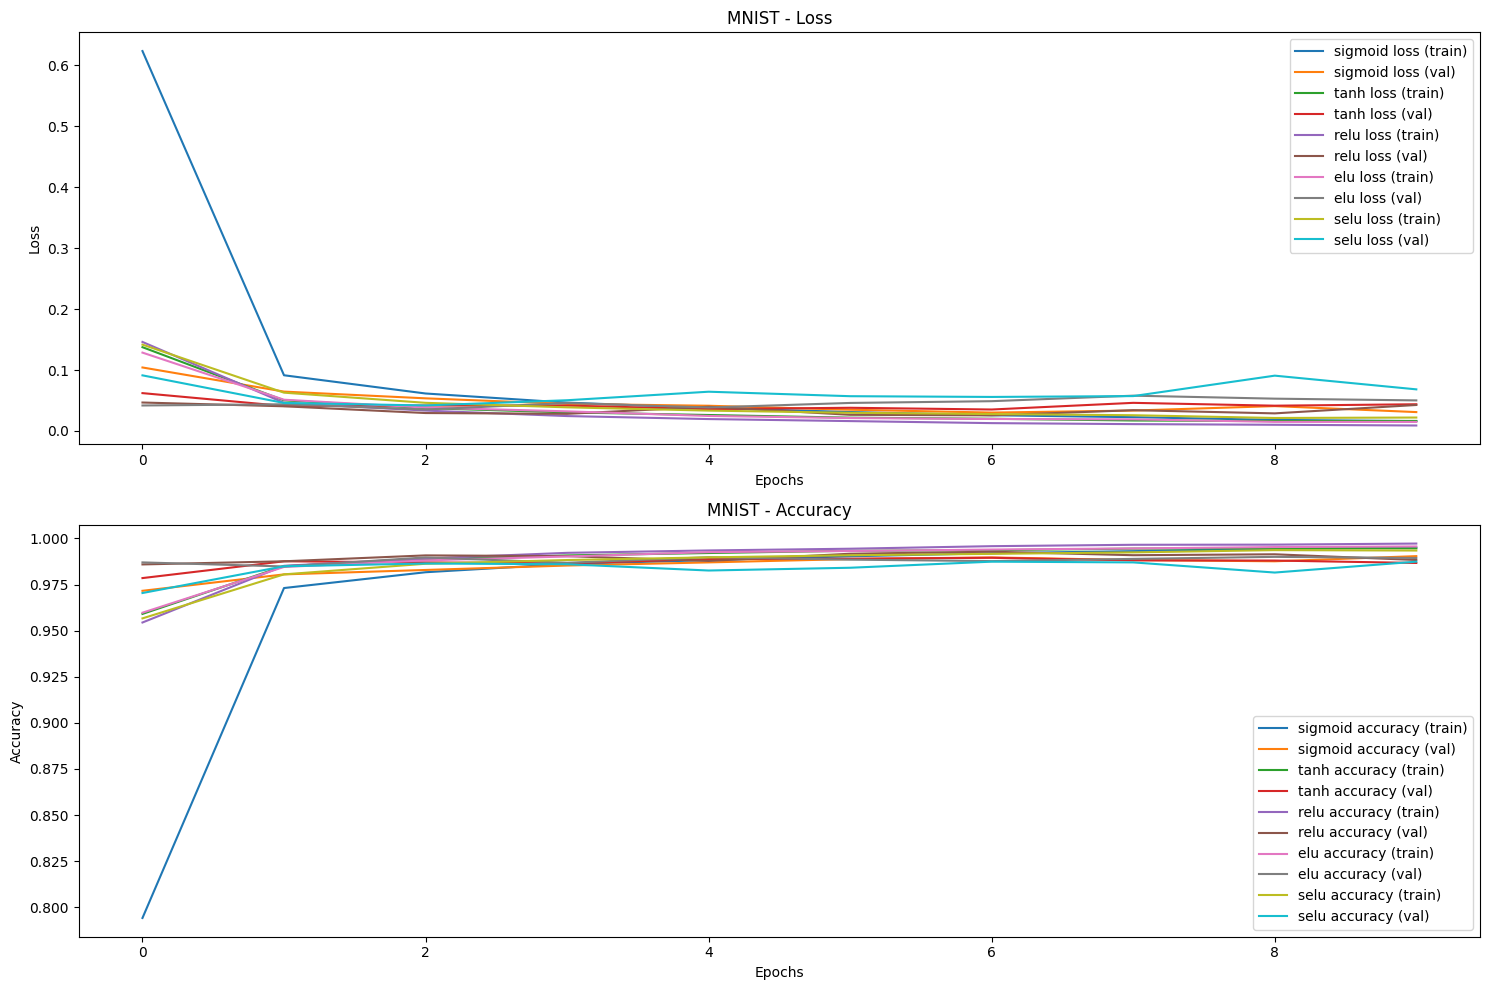


Training on CIFAR-10 dataset...

Using activation: sigmoid
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1481 - loss: 2.2292 - val_accuracy: 0.3612 - val_loss: 1.7975
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3830 - loss: 1.7079 - val_accuracy: 0.4446 - val_loss: 1.5303
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4536 - loss: 1.5178 - val_accuracy: 0.4769 - val_loss: 1.4350
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4867 - loss: 1.4228 - val_accuracy: 0.4935 - val_loss: 1.4033
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5123 - loss: 1.3519 - val_accuracy: 0.5180 - val_loss: 1.3260
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5408 - loss: 1.2852 - val_accuracy: 0.5397 - val_loss: 1.2707
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5633 - loss: 1.2239 - val_accuracy: 0.5428 - val_loss: 1.2654
Epoch 8/10
1563/1563 ━━━━━━━━

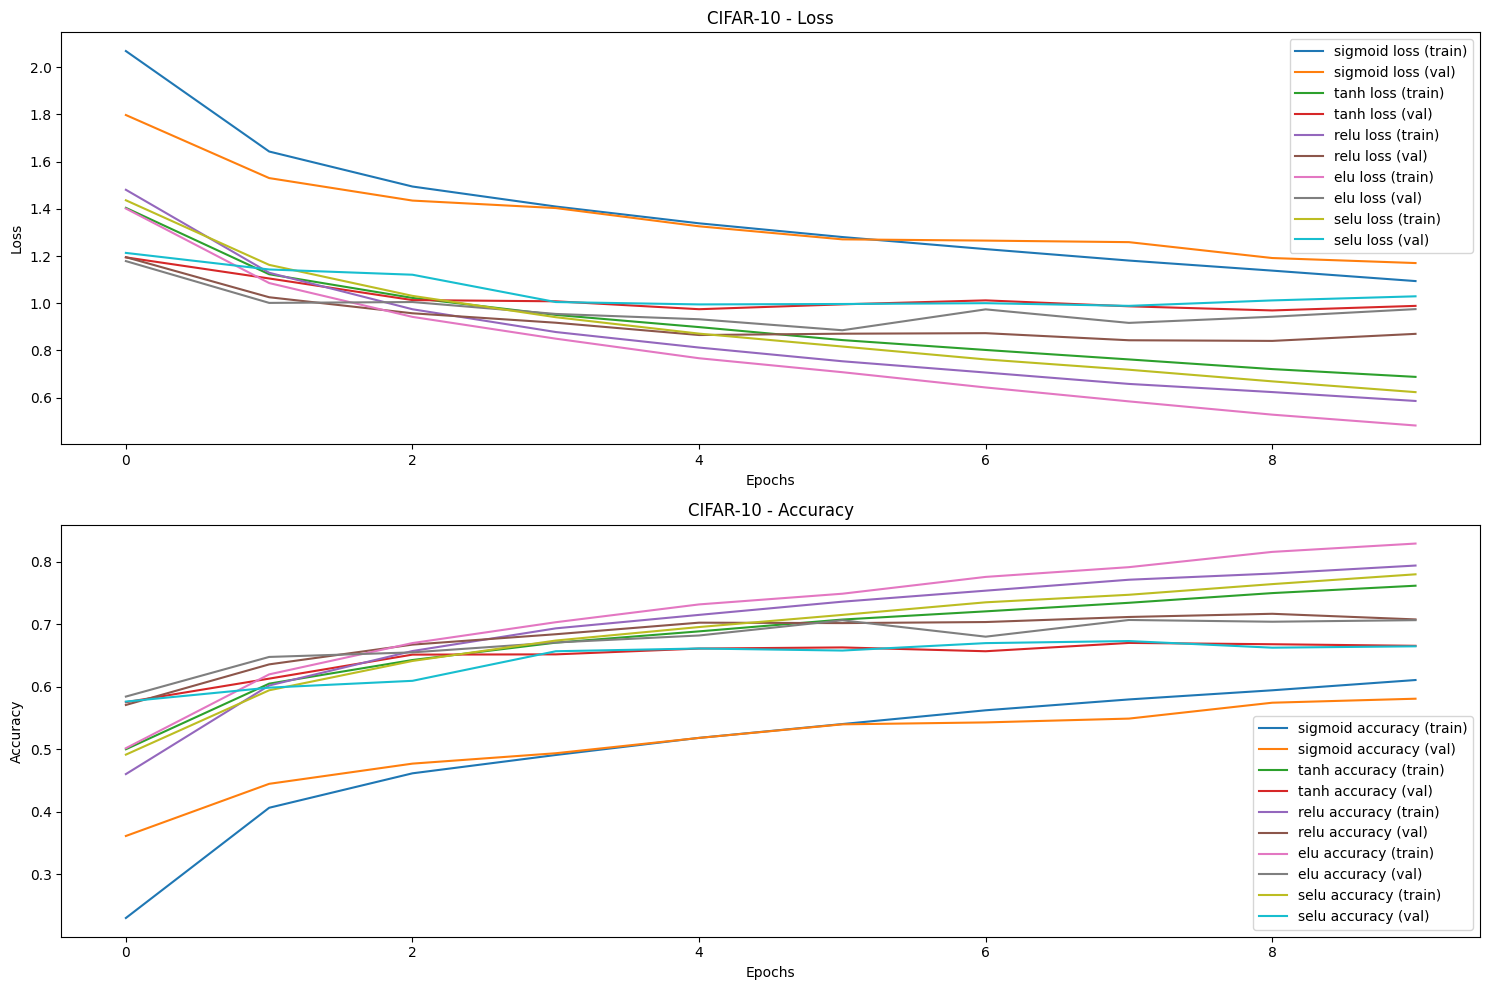

In [ ]:
# Activation functions and datasets
activation_functions = ['sigmoid', 'tanh', 'relu', 'elu', 'selu']
datasets = [
    ('MNIST', x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist, (28, 28, 1)),
    ('CIFAR-10', x_train_cifar, y_train_cifar, x_test_cifar, y_test_cifar, (32, 32, 3))
]

# Train and evaluate models
for dataset_name, x_train, y_train, x_test, y_test, input_shape in datasets:
    histories = {}
    print(f'\nTraining on {dataset_name} dataset...')
    for activation in activation_functions:
        print(f'\nUsing activation: {activation}')
        model = create_cnn(activation, input_shape)
        history = train_and_evaluate(model, x_train, y_train, x_test, y_test)
        histories[activation] = history

    # Plot metrics
    plot_metrics(histories, dataset_name)

Based on the analysis of the loss and accuracy plots for different activation functions:


*   For the MNIST dataset, both ReLU and SELU performed exceptionally well, with slightly better accuracy and minimal loss, making them the most suitable choices.

*   For the CIFAR-10 dataset, ReLU and ELU demonstrated better performance in terms of both accuracy and loss, suggesting their suitability for this dataset.


Overall, ReLU serves as a reliable default choice for both datasets, with SELU and ELU as strong alternatives depending on the dataset characteristics.